In [1]:
import pandas as pd
import random as rd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Task 1 Identify Features
Assemble a dataset consisting of features and target (for example in a dataframe or in two arrays X and y). What features are relevant for the prediction task? What features should be excluded because they leak the target information? Show visualizations or statistics to support your selection.

### Task 1 Work Explanation: 
1. **Random Sampling**: Random Samples of size 10000 are selected from both the General and Research datasets and assembled into a dataset of 20000 rows. We only select the features that are common in two datasets as the missing columns will leak information of the target group. This process leaves us 64 features.
2. **Missing Values**: Features with more than 50% missing values are dropped from the dataset, which reduces the number of features to 32.  

**After finding all features that have more than 50 percent missing and exclude them, the team further reduces the number of features by finding the features that are either leaking information, highly repetitive, heavily imbalanced, or simply meaningless. These features are listed below.**

3. **Leak information**: 'Physician_First_Name', 'Recipient_State', 'Recipient_City’, 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID', 'Physician_Last_Name’, 'Physician_Profile_ID', 'Recipient_Primary_Business_Street_Address_Line1’, 'Recipient_Zip_Code’, 'Covered_Recipient_Type’, 'Physician_License_State_code1', 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State','Physician_Primary_Type'

4. **Highly Repetitive**: 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name' (corresponds with 'Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name')

5. **Heavily imbalanced**: 'Recipient_Country', 'Dispute_Status_for_Publication', 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country', 'Program_Year’, 'Delay_in_Publication_Indicator', 'Change_Type'

6. **Meaningless**: 'Record_ID’, 'Date_of_Payment’, 'Payment_Publication_Date’

**That leaves the following features as possible candidates.**

'Covered_or_Noncovered_Indicator_1',
'Physician_Specialty',
'Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name',
'Form_of_Payment_or_Transfer_of_Value',
'Physician_Primary_Type',
'Associated_Drug_or_Biological_NDC_1',
'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1',
'Total_Amount_of_Payment_USDollars', 
'Product_Category_or_Therapeutic_Area_1',
'Related_Product_Indicator',
'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1'

In [5]:
%%time
## Read GNRL dataset
filename = "OP_DTL_GNRL_PGYR2017_P01182019.csv"
n = sum(1 for line in open(filename)) -1
s = 10000
skip =sorted(rd.sample(range(1, n+1),n-s))
GNRL = pd.read_csv(filename, skiprows = skip)

CPU times: user 55.4 s, sys: 6.51 s, total: 1min 1s
Wall time: 1min 4s


In [6]:
%%time
## Read RSRCH dataset
filename = "OP_DTL_RSRCH_PGYR2017_P01182019.csv"
n = sum(1 for line in open(filename)) -1
s = 10000
skip =sorted(rd.sample(range(1, n+1),n-s))
RSRCH = pd.read_csv(filename, skiprows = skip)

CPU times: user 3.54 s, sys: 458 ms, total: 4 s
Wall time: 4.06 s


In [7]:
## Assemble datasets X and y by taking common columns
intersect = list(set(GNRL.columns).intersection(set(RSRCH.columns)))
X = pd.concat([RSRCH[intersect], GNRL[intersect]], axis=0)
y = np.concatenate((np.ones(10000), np.zeros(10000)), axis=0)
X.shape, y.shape

((20000, 64), (20000,))

In [8]:
## Find features that have more than 50 percent missing data and drop them
missing_percent = X.apply(lambda x: sum(x.isnull())/20000)
missing_columns = []
for i in range(len(missing_percent)):
    if missing_percent[i] > 0.5:
        missing_columns.append(X.columns[i])
X_cleaned =X.drop(missing_columns, axis =1)

In [9]:
## print number of remaining features and their names
print(X_cleaned.shape)

(20000, 32)


In [10]:
## visualize information leak
for i in X_cleaned.columns:
    print("{0} unique values, {1}".format(len(X_cleaned[i]\
                                              .unique()), i))

3467 unique values, Physician_First_Name
37 unique values, Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State
7338 unique values, Physician_Last_Name
7 unique values, Physician_Primary_Type
587 unique values, Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID
686 unique values, Associated_Drug_or_Biological_NDC_1
8813 unique values, Recipient_Zip_Code
3 unique values, Covered_or_Noncovered_Indicator_1
1741 unique values, Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1
2 unique values, Dispute_Status_for_Publication
9958 unique values, Physician_Profile_ID
597 unique values, Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name
20000 unique values, Record_ID
3540 unique values, Recipient_City
18 unique values, Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country
53 unique values, Physician_License_State_code1
1 unique values, Delay_in_Publication_Indicator
4 unique values, Recipient_Country
171 unique values, Physician_Specialty
54 uniqu

In [11]:
## visualize features with heavy imbalance
## same for others mentioned
X['Dispute_Status_for_Publication'].value_counts()

No     19992
Yes        8
Name: Dispute_Status_for_Publication, dtype: int64

In [12]:
## visualize highly repetitive feature
same_row = sum(X['Applicable_Manufacturer_or_Applicable_\
GPO_Making_Payment_Name']== X['Submitting_Applicable_Manufacturer\
_or_Applicable_GPO_Name'])
print("{}/20000 rows are the exactly same for two features.".format(same_row))


15606/20000 rows are the exactly same for two features.


In [13]:
## drop features that are leaking information, highly repetitive,
## heavily imbalanced, or simply meaningless
bad_columns = ['Physician_First_Name', 'Physician_Primary_Type',
               'Recipient_State', 'Recipient_City', 
               'Applicable_Manufacturer_or_'\
               'Applicable_GPO_Making_Payment_ID',
               'Physician_Last_Name', 
               'Physician_Profile_ID',
               'Recipient_Primary_Business_Street_Address_Line1', 
               'Recipient_Zip_Code', 'Covered_Recipient_Type',
               'Physician_License_State_code1',
               'Applicable_Manufacturer_or_Applicable'\
               '_GPO_Making_Payment_State',
               'Applicable_Manufacturer_or_Applicable'\
               '_GPO_Making_Payment_Name',
               'Recipient_Country', 'Dispute_Status_for_Publication', 
               'Applicable_Manufacturer_or_Applicable_GPO_Making'\
               '_Payment_Country',
               'Program_Year', 
               'Delay_in_Publication_Indicator', 'Change_Type',
               'Record_ID', 'Date_of_Payment', 'Payment_Publication_Date']
X_cleaned_all = X_cleaned.drop(bad_columns, axis=1)

In [14]:
X_cleaned_all.shape

(20000, 10)

## Task 2 Preprocessing and Baseline
Create a simple minimum viable model by doing an initial selection of features, doing appropriate preprocessing and cross-validating a linear model. Feel free to generously exclude features or do simplified preprocessing for this task. As mentioned before, you don’t need to validate the model on the whole dataset.

### Task 2 Work Explanation: 
We used the features that we selected in task 1. For categorical features, we impute the missing values with simply a new category "missing", and encode them using OheHotEncoder. For continuous features, we standardized them using StandardScaler. We used logistic regression as our baseline model and it achieved a validation score of 0.982. 

In [15]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split, \
cross_val_score
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, \
OneHotEncoder
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,\
cross_val_score, StratifiedKFold
from sklearn.impute import SimpleImputer

In [16]:
%%time
X_train, X_test, y_train, y_test = \
train_test_split(X_cleaned_all, y, stratify=y)
categorical = X_train.dtypes == object
enc = make_pipeline(SimpleImputer\
                    (strategy='constant', fill_value='Missing'), 
                             OneHotEncoder\
                    (sparse = False, handle_unknown='ignore'))
pre = make_column_transformer((StandardScaler(), ~categorical),
                            (enc, categorical))
# pipe = make_pipeline(pre, KNeighborsClassifier(n_neighbors=5))
#pipe.fit(X_train, y_train)
#pipe.score(X_test, y_test)

CPU times: user 16 ms, sys: 3.67 ms, total: 19.6 ms
Wall time: 18.4 ms


### Minimum Viable Model: Logistic Regression

In [17]:
%%time
lg_pipe = make_pipeline(pre, LogisticRegression())
scores = cross_val_score(lg_pipe, X_train, y_train, cv =10)
print("validation score = ", np.round(np.mean(scores),3))

validation score =  0.982
CPU times: user 6.38 s, sys: 3.6 s, total: 9.98 s
Wall time: 8.44 s


## Task 3 Feature Engineering
Create derived features and perform more in-depth preprocessing and data cleaning. Does this improve your model? In particular, think about how to encode categorical variables.

### Task 3 Work Explanation: 
Categorical variables are encoded using target encoding instead of OneHotEncoder. It boosts the validation score by 1%. It is also much faster, takes less than 10% of the original time since OneHotEncoder takes a long time.

In [18]:
X_copy = X_cleaned_all.copy()
X_copy = X_copy.fillna(value='Missing')
X_train, X_test, y_train, y_test = \
train_test_split(X_copy, y, stratify=y)
X_train['y'] = y_train
X_test['y'] = y_test
for i in X_train.columns:
    X_train[i] = X_train[i].map(X_train.groupby(i)['y'].mean())
#     X_test[i] = X_test[i].map(X_train.groupby(i)['y'].mean())
X_train = X_train.drop(columns=['y'])
# X_test = X_test.drop(columns=['y'])
categorical = X_train.dtypes == object
enc = make_pipeline(OneHotEncoder(sparse = False,\
                                  handle_unknown='ignore'))
pre = make_column_transformer((StandardScaler(), ~categorical),
                            (enc, categorical))

In [19]:
%%time
lg_pipe = make_pipeline(pre, LogisticRegression())
scores = cross_val_score(lg_pipe, X_train, y_train, cv =10)
lg_pipe.fit(X_train, y_train)
print("validation score = ", np.round(np.mean(scores),3))

validation score =  0.993
CPU times: user 771 ms, sys: 16.8 ms, total: 787 ms
Wall time: 434 ms


## Task 4 Any model
Use any classification model we discussed (trees, forests, gradient boosting, SVM) to improve your result. You can (and probably should) change your preprocessing and feature engineering to be suitable for the model. You are not required to try all of these models. Tune parameters as appropriate.

### Task 4 Work Explanation: 
We ran SVM and random forest classification models and tuned the parameters of random forest model. The validation scores of both models and the best parameters are printed. 

### SVM

In [20]:
%%time
svm_pipe = make_pipeline(pre, svm.SVC(gamma='scale'))
scores = cross_val_score(svm_pipe, X_train, y_train, cv =10)
print("validation score =", np.round(np.mean(scores),3))

validation score = 0.993
CPU times: user 3.74 s, sys: 64.2 ms, total: 3.8 s
Wall time: 2.12 s


### Random Forest

In [21]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rm_pipe = make_pipeline(pre, \
                        RandomForestClassifier(n_estimators = 100))
param_grid = {
    "randomforestclassifier__max_depth": [80, 90, 100, 110],
    'randomforestclassifier__max_features': [2, 3, 4]
    #'randomforestclassifier__n_estimators': [100, 200, 300, 1000]
}
grid = GridSearchCV(rm_pipe, param_grid, cv =10)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}"\
      .format(grid.best_score_))
print(grid.best_params_)
#scores = cross_val_score(rm_pipe, X_train, y_train, cv =10)
#print("validation score =", np.round(np.mean(scores),3))
#rm_pipe.fit(X_train, y_train)
#print("Test Score = ",rm_pipe.score(X_test, y_test))

best mean cross-validation score: 0.996
{'randomforestclassifier__max_depth': 90, 'randomforestclassifier__max_features': 4}
CPU times: user 1min 10s, sys: 217 ms, total: 1min 11s
Wall time: 1min 11s


## Task 5 Feature Selections
Identify features that are important for your best model. Which features are most influential, and which features could be removed without decrease in performance? Does removing irrelevant features make your model better?

### Task 5 Work Explanation: 
Keeping only two features, 'Physician_Specialty' and 'Total_Amount_of_Payment_USDollars', only decreases the validation score by 0.003. Keepling only one feature, 'Physician_Specialty', still manages to maintain a high validation score of 0.976. It is fairly obvious that 'Physician_Specialty' is the most important feature and 'Total_Amount_of_Payment_USDollars' is the second most important feature. Removing irrelevant features certainly makes the model much faster to run, but sacrifices some accuracy. It depends on the actual scenario to select the number of features to keep. The logistic regression coefficients plot in the end also confirms the top 2 important features we discovered.

In [22]:
%%time
from sklearn.feature_selection import \
SelectKBest, SelectPercentile, SelectFpr
from sklearn.feature_selection import f_regression
select = SelectKBest(k=2,score_func = f_regression)
select_pipe = make_pipeline(StandardScaler(),select,\
                            LogisticRegression())
scores = cross_val_score(select_pipe, X_train, y_train, cv=10)
print("validation score = ", np.round(np.mean(scores),3))
select.fit(X_train, y_train)
features_names = list(X_train.columns[select.\
                                      get_support(indices=True)])
print(features_names)

validation score =  0.991
['Physician_Specialty', 'Total_Amount_of_Payment_USDollars']
CPU times: user 455 ms, sys: 8.97 ms, total: 464 ms
Wall time: 256 ms


In [23]:
select = SelectKBest(k=1,score_func = f_regression)
select_pipe = make_pipeline(StandardScaler(),\
                            select,LogisticRegression())
scores = cross_val_score(select_pipe, X_train, y_train, cv=10)
print("validation score = ", np.round(np.mean(scores),3))
select.fit(X_train, y_train)
features_names = list(X_train.columns\
                      [select.get_support(indices=True)])
print(features_names)

validation score =  0.977
['Physician_Specialty']


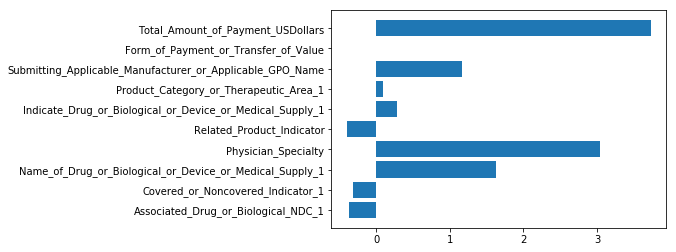

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
fig, ax = plt.subplots()
ax.barh(np.arange(len(X_train.columns)), lg_pipe.\
        named_steps['logisticregression'].coef_[0], align='center')
ax.set_yticks(np.arange(len(X_train.columns)))
ax.set_yticklabels(X_train.columns)
plt.show()

## Task 6 An explainable model
Can you create an “explainable” model that is nearly as good as your best model? An explainable model should be small enough to be easily inspected - say a linear model with few enough coefficients that you can reasonable look at all of them, or a tree with a small number of leafs etc.

### Task 6 Work Explanation: 
We created a simple decision tree with max_depth=2, with the two most important features we discovered in task 5. The validation score is nearly as good as our random forest model in task 4. The tree plot is shown below. 

In [26]:
X_explain = X[['Physician_Specialty', 'Total_Amount_of_Payment_USDollars']]
X_explain = X_explain.fillna(value='Missing')
X_train, X_test, y_train, y_test = train_test_split(X_explain, y, stratify=y)
X_train['y'] = y_train
for i in X_train.columns:
    X_train[i] = X_train[i].map(X_train.groupby(i)['y'].mean())
X_train = X_train.drop(columns=['y'])
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=2)
scores = cross_val_score(clf, X_train, y_train, cv =10)
print("validation score =", np.round(np.mean(scores),3))

validation score = 0.992


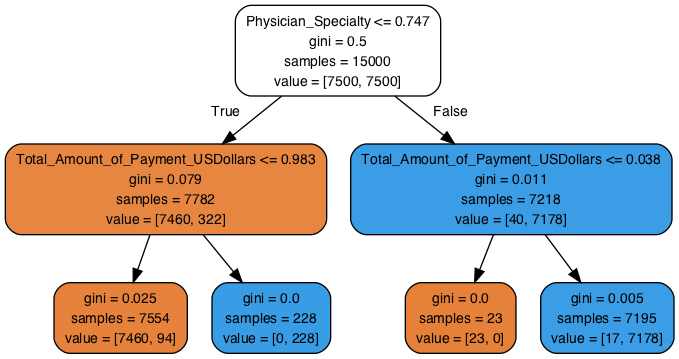

In [27]:
from graphviz import Source
from IPython.display import SVG
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
clf.fit(X_train, y_train)
dot_data = tree.export_graphviz(clf,
                                feature_names=X_train.columns,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png()) 